# Mục mới

In [ ]:
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('/customer_purchase_data.csv')

print("Dataset shape of df is", df.shape) #Total Row & Column
df

Dataset shape of df is (1500, 9)


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


In [ ]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [ ]:
# Statistical summary
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
AnnualIncome,0
NumberOfPurchases,0
ProductCategory,0
TimeSpentOnWebsite,0
LoyaltyProgram,0
DiscountsAvailed,0
PurchaseStatus,0


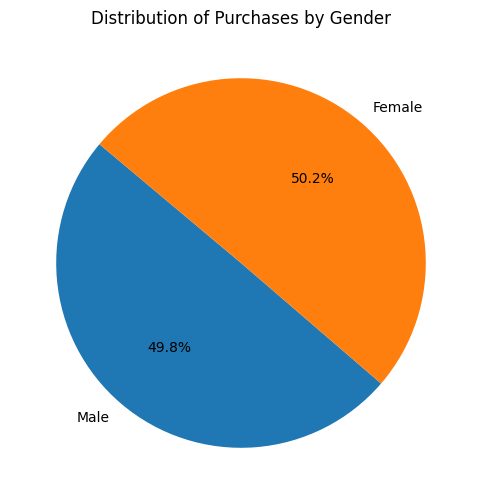

In [ ]:
# Gender distribution
total = df.groupby('Gender')['NumberOfPurchases'].sum()
total.index = ['Male' ,'Female']
plt.figure(figsize= (8,6))
colors = ['#1f77b4', '#ff7f0e']
plt.pie(total , labels= total.index,autopct='%1.1f%%' , colors = colors , startangle=140)
plt.title('Distribution of Purchases by Gender')

plt.show()

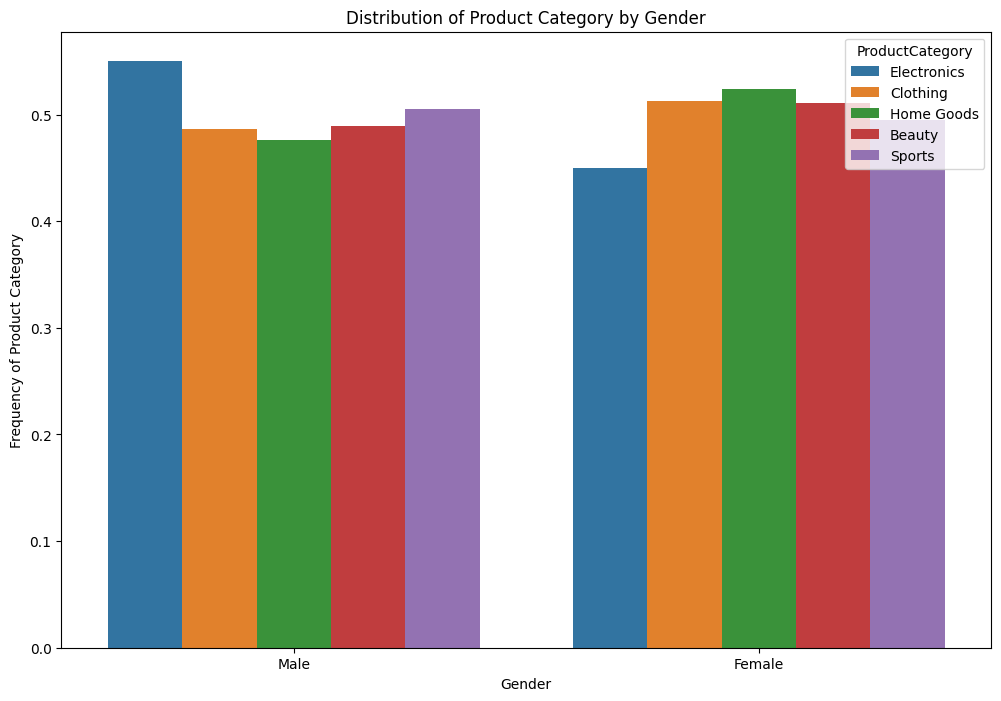

In [ ]:
df['ProductCategory'].values

sex= {0: 'Female',
      1: 'Male'}

df_product = df['Gender'].replace(sex).groupby(df['ProductCategory']).value_counts(normalize = True).rename('frequency').to_frame().reset_index()

mask = {0: 'Electronics',
       1: 'Clothing',
       2: 'Home Goods',
       3: 'Beauty',
       4: 'Sports'}

df_product['ProductCategory'] = df_product['ProductCategory'].replace(mask)
df_product['ProductCategory']

fig = plt.figure(figsize =(12,8) )
sns.barplot(
    x= 'Gender',
    y= 'frequency',
    hue = 'ProductCategory',
    data= df_product
)
plt.ylabel('Frequency of Product Category')
plt.xlabel('Gender')
plt.title('Distribution of Product Category by Gender');
fig.show()

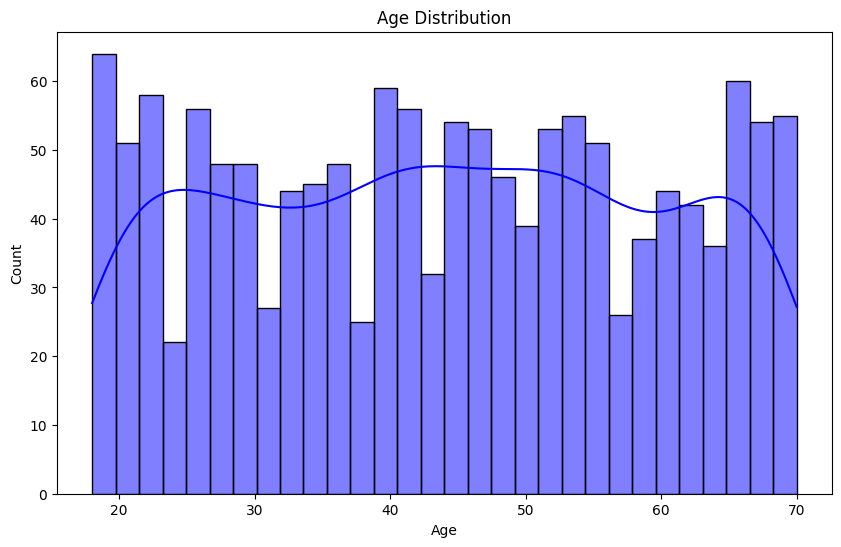

In [ ]:
# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

In [ ]:
mask_PurperAge = {'under 30':(df[df['Age'] < 30]['NumberOfPurchases']).sum(),
                 '31-40':(df[(df['Age'] >= 30) & (df['Age'] < 41)]['NumberOfPurchases']).sum(),
                 '41-50': (df[(df['Age'] >= 41) & (df['Age'] < 51)]['NumberOfPurchases']).sum(),
                 '51-60':(df[(df['Age'] >= 51) & (df['Age'] < 61)]['NumberOfPurchases']).sum(),
                 'above 60': (df[(df['Age'] >= 61) & (df['Age'] < 71)]['NumberOfPurchases']).sum() }

In [ ]:
import plotly.express as px
fig = px.bar(x= list(mask_PurperAge.keys()) , y = list(mask_PurperAge.values()))
fig.update_layout(title= "Number of Purchase by Age Group",
                 xaxis_title= "Age Group",
                 yaxis_title= 'Number Of Purchase');
fig = px.bar(x=list(mask_PurperAge.keys()), y=list(mask_PurperAge.values()),
             text=list(mask_PurperAge.values())) # Thêm chú thích bằng text

fig.update_layout(title="Number of Purchase by Age Group",
                  xaxis_title="Age Group",
                  yaxis_title='Number Of Purchase')

fig.update_traces(textposition='outside') # Đặt vị trí chú thích bên ngoài cột

fig.show()

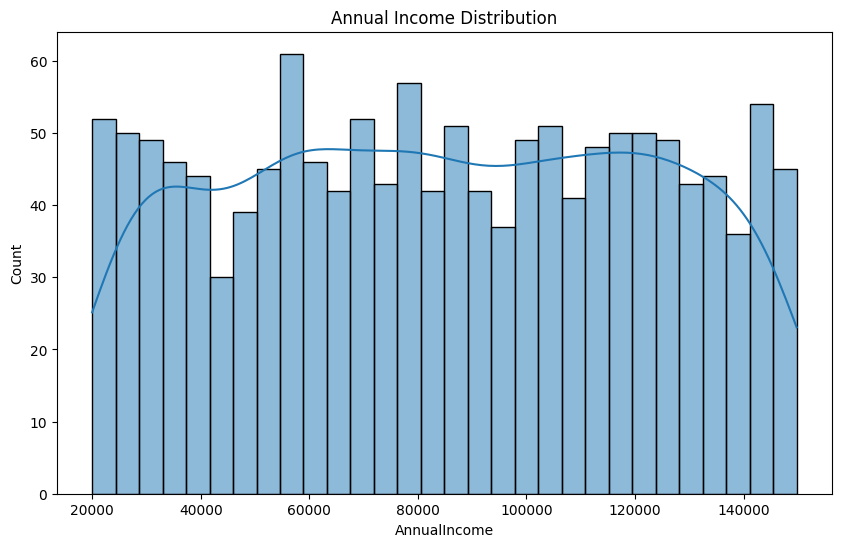

In [ ]:
# Annual Income distribution
plt.figure(figsize=(10,6))
sns.histplot(df['AnnualIncome'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.show()

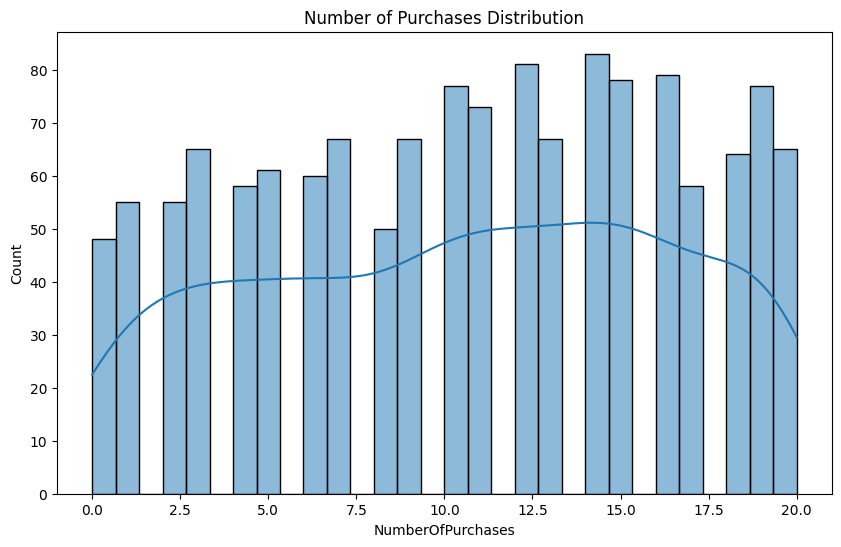

In [ ]:
# Number of Purchases distribution
plt.figure(figsize=(10,6))
sns.histplot(df['NumberOfPurchases'], bins=30, kde=True)
plt.title('Number of Purchases Distribution')
plt.show()

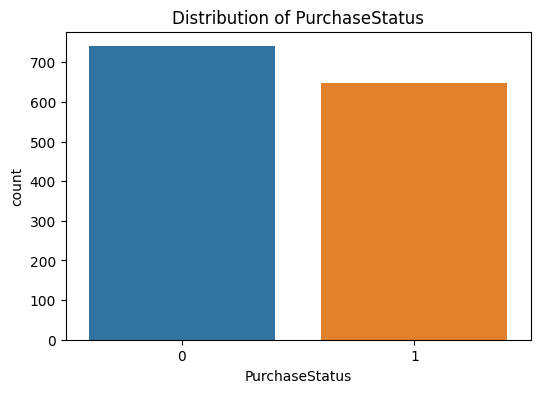

In [ ]:
# Distribution of PurchaseStatus
plt.figure(figsize=(6, 4))
sns.countplot(x='PurchaseStatus', data=df, hue='PurchaseStatus', palette=['#1f77b4', '#ff7f0e'], legend=False)
plt.title('Distribution of PurchaseStatus')
plt.show()

<ipython-input-66-62bb296e614a>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




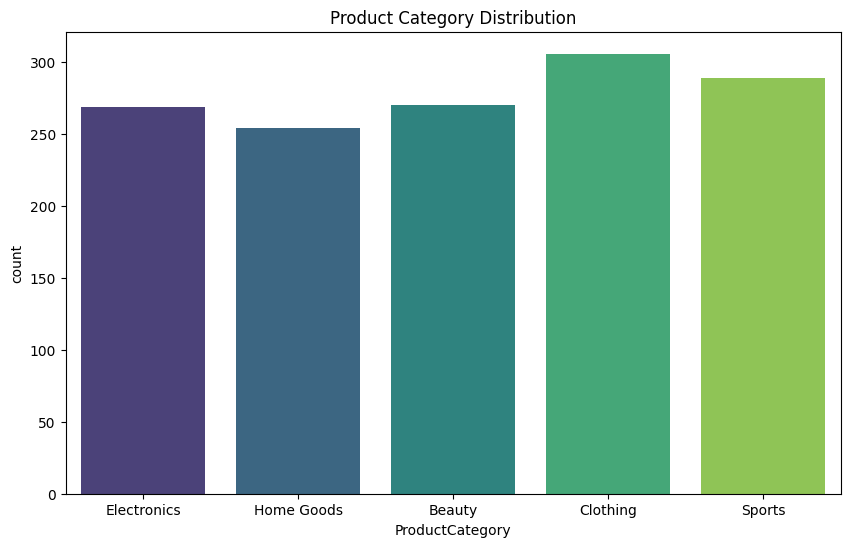

In [ ]:
# Product Category distribution
df['ProductCategory'] = df['ProductCategory'].replace({
    0: 'Electronics',
    1: 'Clothing',
    2: 'Home Goods',
    3: 'Beauty',
    4: 'Sports'
})

plt.figure(figsize=(10,6))
sns.countplot(x='ProductCategory', data=df, palette='viridis')
plt.title('Product Category Distribution')
plt.show()

<ipython-input-67-3038aae883a9>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




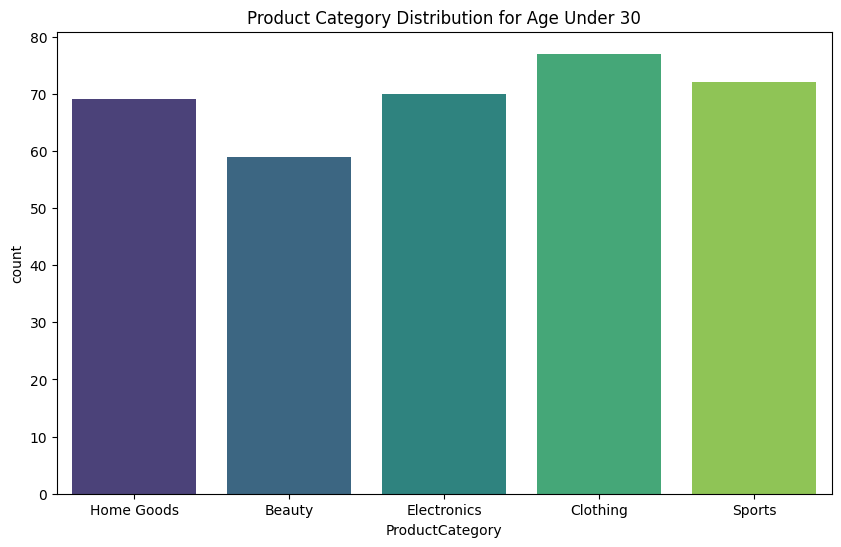

In [ ]:
# mở rộng 01 -


df_U30 = df[(df['Age'] <= 30)]
plt.figure(figsize=(10, 6))
sns.countplot(x='ProductCategory', data=df_U30,palette='viridis')
plt.title('Product Category Distribution for Age Under 30')
plt.show()

<ipython-input-68-0e5f5b33aeb9>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




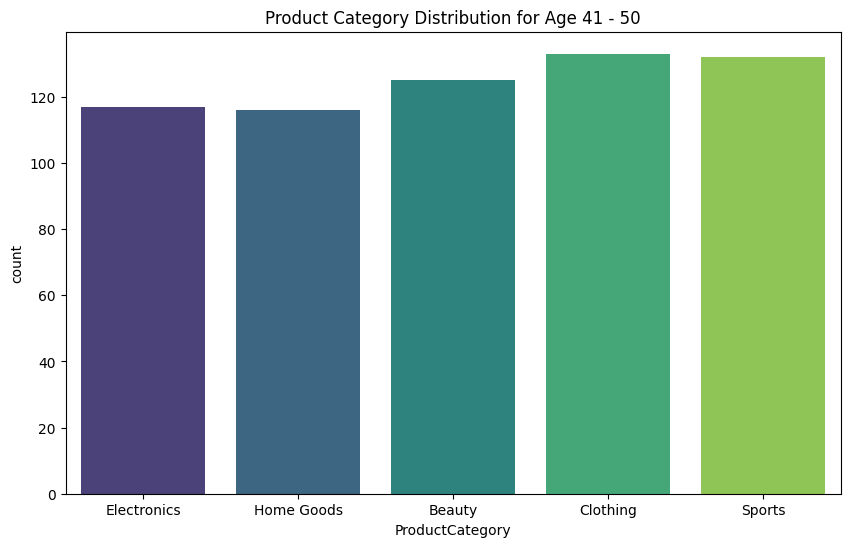

In [ ]:
# mở rộng 01+


df_41_50 = df[(df['Age'] <= 41) & (df['Age'] <= 50)]
plt.figure(figsize=(10, 6))
sns.countplot(x='ProductCategory', data=df_41_50,palette='viridis')
plt.title('Product Category Distribution for Age 41 - 50')
plt.show()

<ipython-input-69-7cb9fd080c1d>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




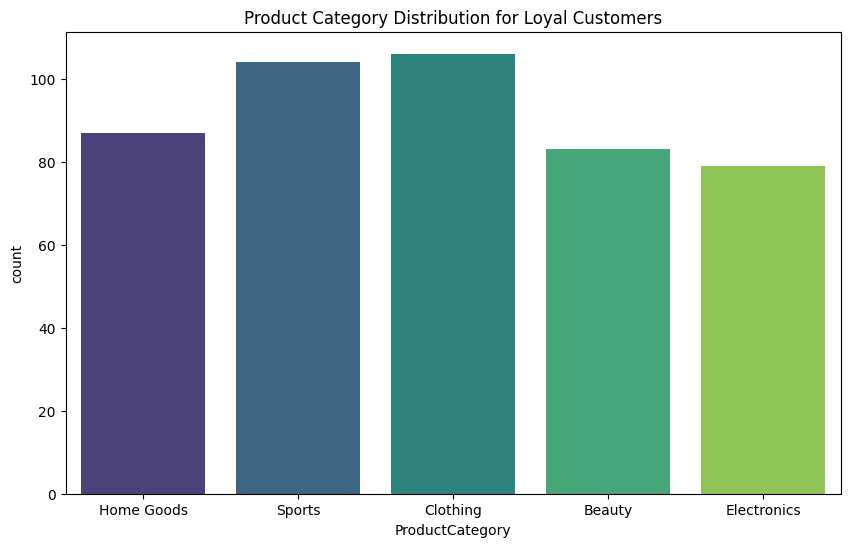

In [ ]:
# mở rộng 03
import pandas as pd
import matplotlib.pyplot as plt

df_loyal_customers = df[(df['NumberOfPurchases'] >= 10) & (df['NumberOfPurchases'] <= 15)]
plt.figure(figsize=(10, 6))
sns.countplot(x='ProductCategory', data=df_loyal_customers, palette='viridis')
plt.title('Product Category Distribution for Loyal Customers')
plt.show()

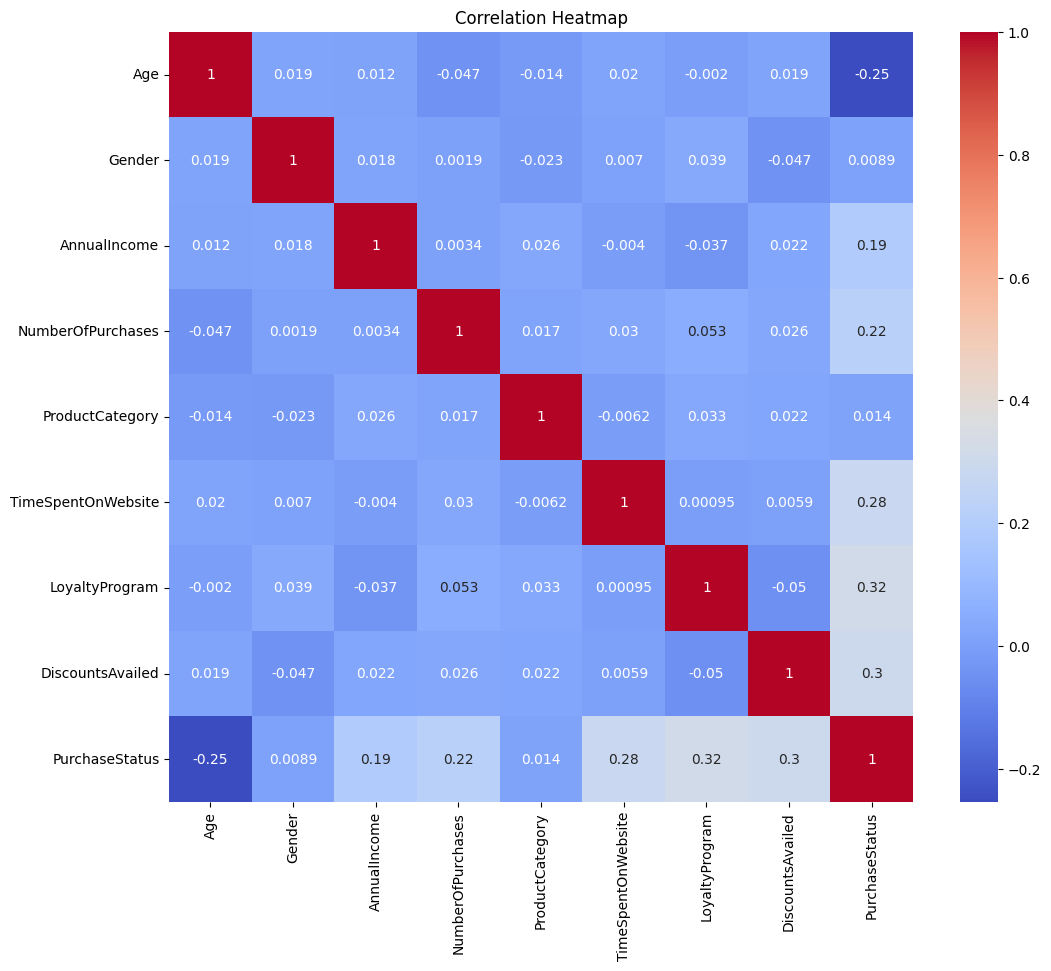

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Split the data into features and target variable
X = df.drop('PurchaseStatus', axis=1)
y = df['PurchaseStatus']

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled data:")
print(X_scaled)

Scaled data:
[[-0.25445635  0.9971223  -0.49506956 ... -0.01054426 -0.7074889
   1.40669061]
 [-1.54628306  0.9971223  -1.62864811 ...  0.44149835 -0.7074889
   1.40669061]
 [-1.09414371  0.9971223   1.14908091 ...  0.05218787  1.41344974
  -1.53557366]
 ...
 [-0.25445635  0.9971223  -0.72841829 ... -1.09255797 -0.7074889
  -1.53557366]
 [ 1.23114435 -1.00288601  1.3143051  ...  0.38678871  1.41344974
  -1.53557366]
 [ 0.391457   -1.00288601 -0.85466085 ... -0.31816703  1.41344974
   0.81823776]]


In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Model**

**Decission Tree Classifier**

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [ ]:
# Decision Tree Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

Decision Tree Classifier:
 Accuracy: 0.8597122302158273
 Precision: 0.8515625
 Recall: 0.8449612403100775
 F1 Score: 0.8482490272373541


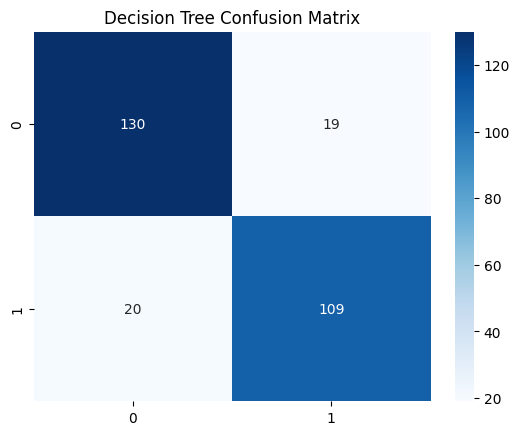

In [ ]:
print(f'Decision Tree Classifier:\n Accuracy: {accuracy_dt}\n Precision: {precision_dt}\n Recall: {recall_dt}\n F1 Score: {f1_dt}')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

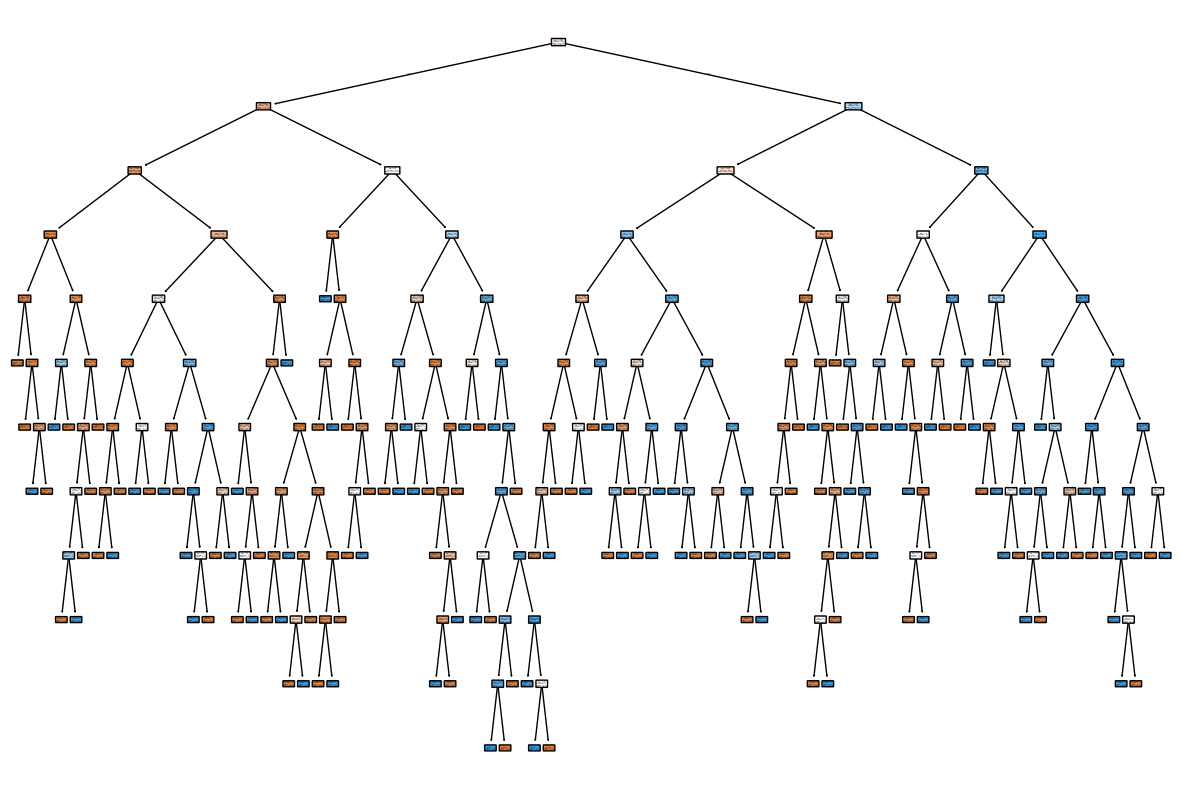

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, rounded=True, class_names=['Class 0', 'Class 1'], feature_names=y)
plt.show()

**Logistic Regression**

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

In [ ]:
# Logistic regression Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

Logistic Regression:
 Accuracy: 0.8525179856115108
 Precision: 0.84375
 Recall: 0.8372093023255814
 F1 Score: 0.8404669260700389


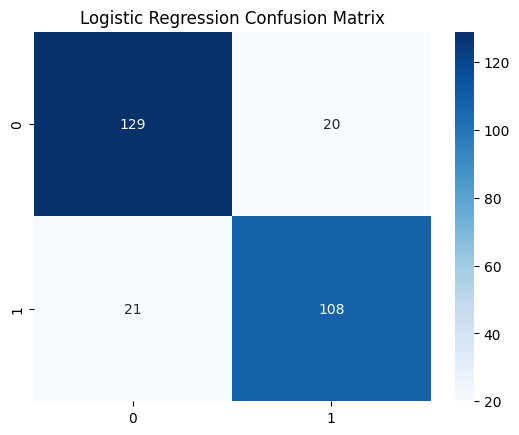

In [ ]:
print(f'Logistic Regression:\n Accuracy: {accuracy_lr}\n Precision: {precision_lr}\n Recall: {recall_lr}\n F1 Score: {f1_lr}')
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

**# Suppor Vector Machine**

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

In [ ]:
# SVM Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

Support Vector Machine:
 Accuracy: 0.8525179856115108
 Precision: 0.8333333333333334
 Recall: 0.8527131782945736
 F1 Score: 0.842911877394636


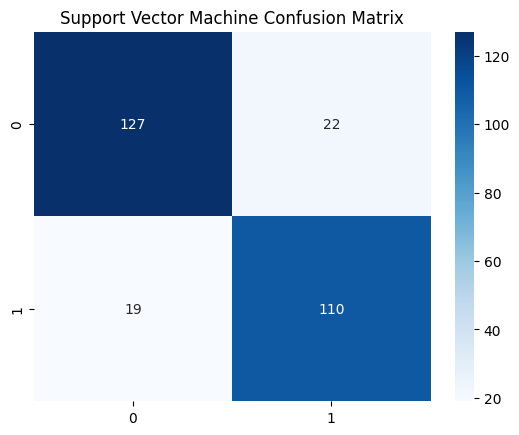

In [ ]:
print(f'Support Vector Machine:\n Accuracy: {accuracy_svm}\n Precision: {precision_svm}\n Recall: {recall_svm}\n F1 Score: {f1_svm}')
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

**Naive Bayes**

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)

In [ ]:
# Naive Bayes Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

Naive Bayes:
 Accuracy: 0.8561151079136691
 Precision: 0.8449612403100775
 Recall: 0.8449612403100775
 F1 Score: 0.8449612403100775


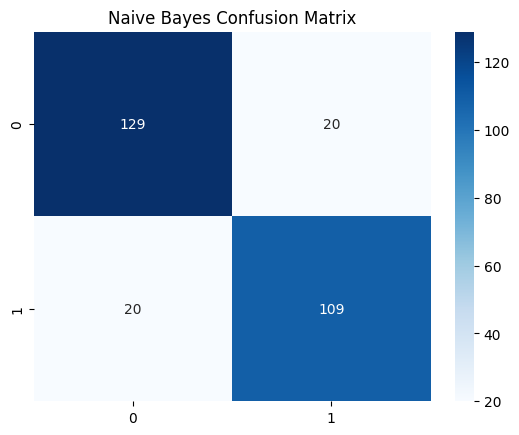

In [ ]:
print(f'Naive Bayes:\n Accuracy: {accuracy_nb}\n Precision: {precision_nb}\n Recall: {recall_nb}\n F1 Score: {f1_nb}')
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

**Random Forest**

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [ ]:
# Random Forest Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

Random Forest:
 Accuracy: 0.935251798561151
 Precision: 0.9512195121951219
 Recall: 0.9069767441860465
 F1 Score: 0.9285714285714286


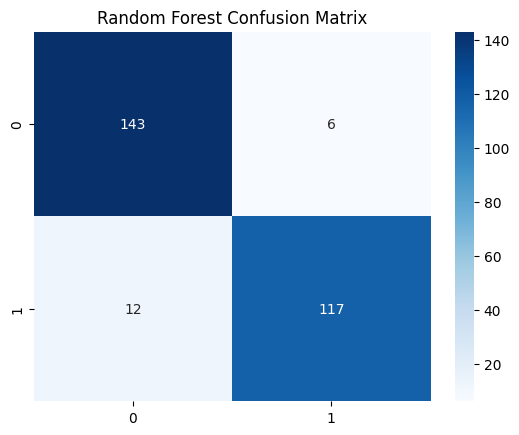

In [ ]:
print(f'Random Forest:\n Accuracy: {accuracy_rf}\n Precision: {precision_rf}\n Recall: {recall_rf}\n F1 Score: {f1_rf}')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



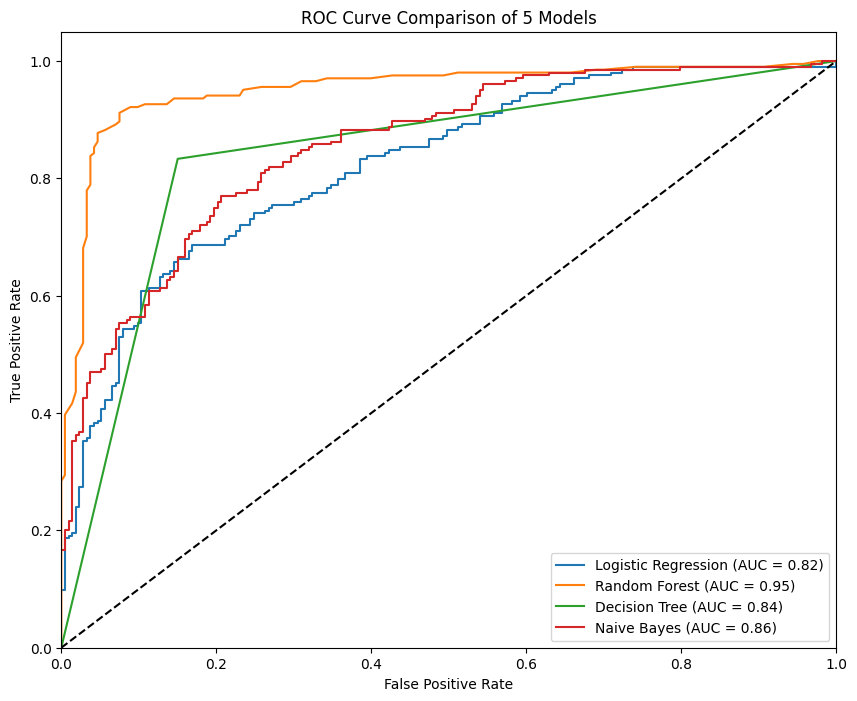

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB())]

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))

for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Get prediction probabilities for the positive class (class 1)
    y_probs = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for this model
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of 5 Models')
plt.legend(loc="lower right")
plt.show()

# Mục mới